In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
spark = SparkSession.builder \
    .appName("Tarea_estadistica") \
    .getOrCreate()

In [2]:
data = pd.ExcelFile('capturas_2015-2020.xlsx')

In [5]:
df_2015 = spark.createDataFrame(data.parse(str(2015)))
df_2016 = spark.createDataFrame(data.parse(str(2016)))
df_2017 = spark.createDataFrame(data.parse(str(2017)))
df_2019 = spark.createDataFrame(data.parse(str(2019)).rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}))
df_2020 = spark.createDataFrame(data.parse(str(2020)).rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}))

1.   Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017,2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

In [6]:
promedios = {}
años= [2015, 2017, 2020]

for year in años:
    if year == 2015:
        df_year = df_2015
    elif year == 2017:
        df_year = df_2017
    else:
        df_year = df_2020 
    promedio_diaphorinas = df_year.groupBy('Mes', 'Ubicacion') \
                                   .agg(mean('No_DiaphorinasXtrampa').alias('PromedioDiaphorinas')) \
                                   .orderBy('Mes')
    promedios[year] = promedio_diaphorinas.toPandas()


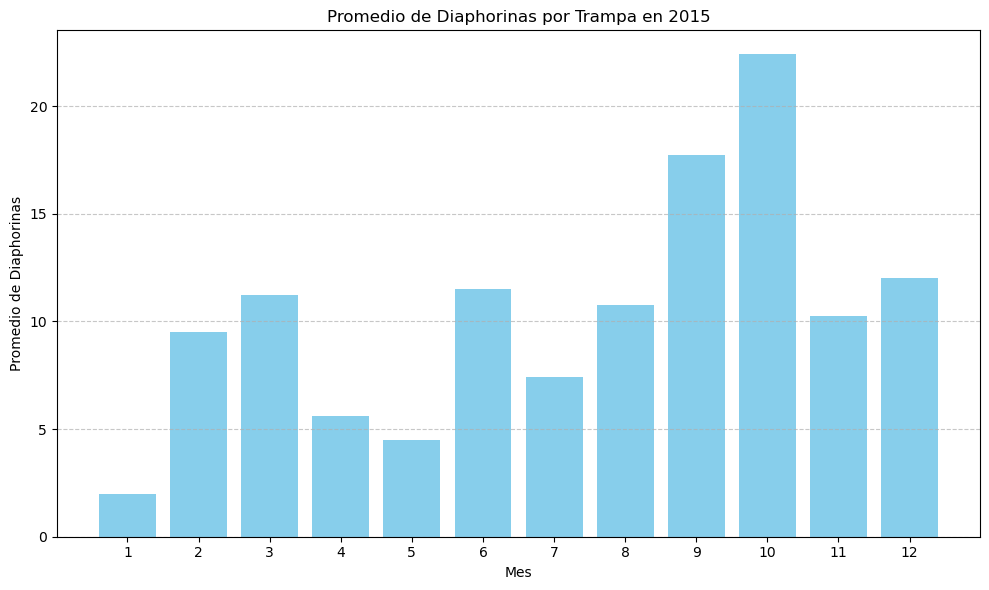

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(promedios[2015]['Mes'], promedios[2015]['PromedioDiaphorinas'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa en 2015')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


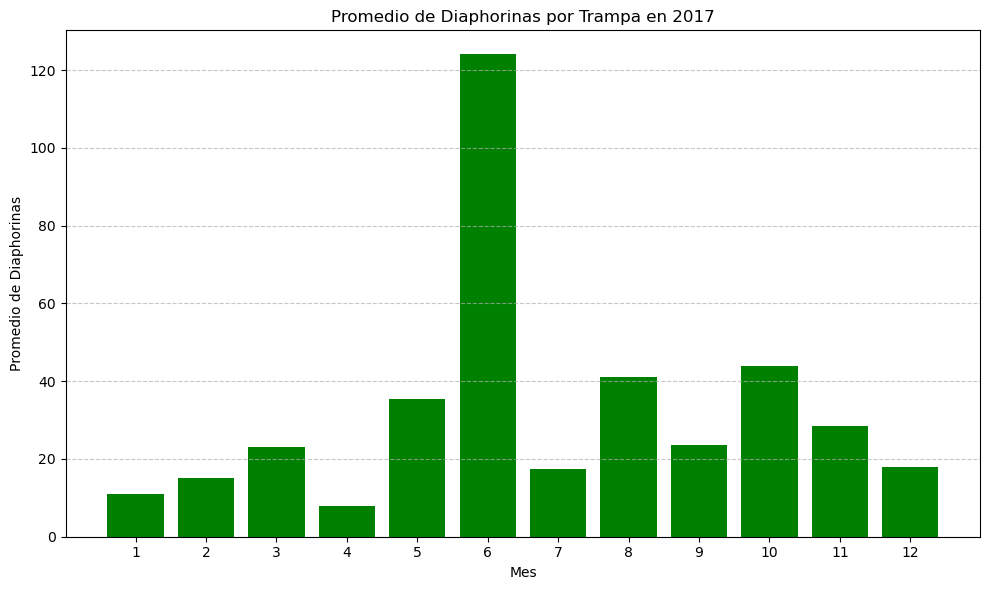

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2017]['Mes'], promedios[2017]['PromedioDiaphorinas'], color='green')
plt.title('Promedio de Diaphorinas por Trampa en 2017')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

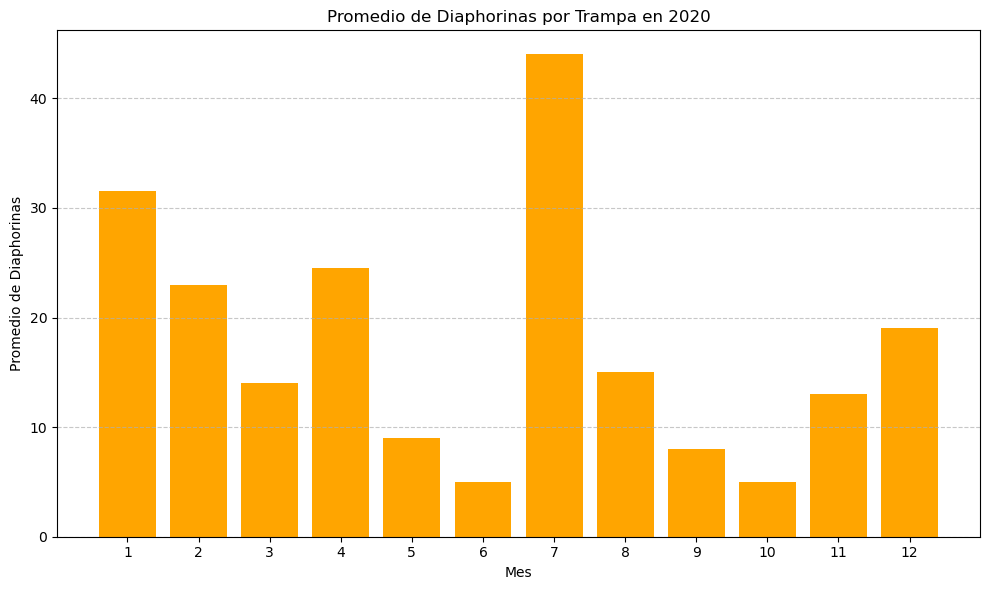

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2020]['Mes'], promedios[2020]['PromedioDiaphorinas'], color='orange')
plt.title('Promedio de Diaphorinas por Trampa en 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.   Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.

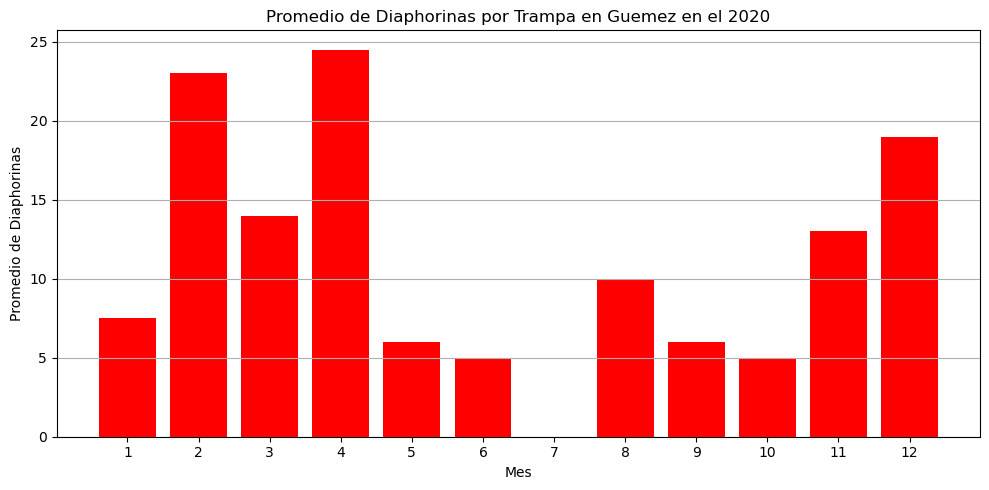

In [12]:
import matplotlib.pyplot as plt
df_municipio = df_2020.filter(df_2020['Municipio'] == 'GUEMEZ')
promedio_mensual = df_municipio.groupBy('Mes', 'Ubicacion') \
                                 .agg(mean('No_DiaphorinasXtrampa').alias('PromedioDiaphorinas')) \
                                 .orderBy('Mes')
promedio_mensual_df = promedio_mensual.toPandas()
plt.figure(figsize=(10, 5))
plt.bar(promedio_mensual_df['Mes'], promedio_mensual_df['PromedioDiaphorinas'], color='red')
plt.title('Promedio de Diaphorinas por Trampa en Guemez en el 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(promedio_mensual_df['Mes'].unique())
plt.grid(axis='y') 
plt.tight_layout()
plt.show()


3.   Hacer una tabla donde la primera columna sea el mes, la segunda el índice Id (por trampa) y la tercera el índice Cx para el año 2015.

In [13]:
from pyspark.sql.functions import variance
media_varianza = df_2015.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza'))
media_varianza = media_varianza.withColumn('Id', media_varianza['Varianza'] / media_varianza['Media']) \
                               .withColumn('Cx', (media_varianza['Varianza'] / media_varianza['Media']) - 1)
tabla_resultado = media_varianza.groupBy('Mes') \
    .agg(mean('Id').alias('Id'), mean('Cx').alias('Cx')) \
    .orderBy('Mes')
tabla_resultado.show()

+----+------------------+-------------------+
| Mes|                Id|                 Cx|
+----+------------------+-------------------+
| 1.0|1.3333333333333333| 0.3333333333333334|
| 2.0|1.5518068844768027| 0.5518068844768023|
| 3.0|  1.95521394850497| 0.9552139485049738|
| 4.0|1.6070147960855599| 0.6070147960855589|
| 5.0| 1.378070072604784|0.37807007260478454|
| 6.0|  1.67061513034008| 0.6706151303400814|
| 7.0|1.6073213594555222|  0.607321359455521|
| 8.0|1.7750268322401335| 0.7750268322401351|
| 9.0|  2.35351199019892|   1.35351199019892|
|10.0| 2.126256404894552| 1.1262564048945518|
|11.0|1.8398149152695118| 0.8398149152695121|
|12.0|1.5855013905058422| 0.5855013905058423|
| NaN|               NaN|                NaN|
+----+------------------+-------------------+



4.   Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020.

In [16]:
tabla_resultado_2015= tabla_resultado.select("Mes", "Id")
tabla_resultado_2015.show()
media_varianza_2016 = df_2016.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza'))
media_varianza_2016 = media_varianza_2016.withColumn('Id', media_varianza_2016['Varianza'] / media_varianza_2016['Media'])
tabla_resultado_2016 = media_varianza_2016.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2016.show()

media_varianza_2017 = df_2017.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza'))
media_varianza_2017 = media_varianza_2017.withColumn('Id', media_varianza_2017['Varianza'] / media_varianza_2017['Media'])
tabla_resultado_2017 = media_varianza_2017.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2017.show()

media_varianza_2019 = df_2019.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza')).dropna()
media_varianza_2019 = media_varianza_2019.withColumn('Id', media_varianza_2019['Varianza'] / media_varianza_2019['Media'])
tabla_resultado_2019 = media_varianza_2019.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2019.show()

media_varianza_2020 = df_2020.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza')).dropna()
media_varianza_2020 = media_varianza_2020.withColumn('Id', media_varianza_2020['Varianza'] / media_varianza_2020['Media'])
tabla_resultado_2020 = media_varianza_2020.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2020.show()

+----+------------------+
| Mes|                Id|
+----+------------------+
| 1.0|1.3333333333333333|
| 2.0|1.5518068844768027|
| 3.0|  1.95521394850497|
| 4.0|1.6070147960855599|
| 5.0| 1.378070072604784|
| 6.0|  1.67061513034008|
| 7.0|1.6073213594555222|
| 8.0|1.7750268322401335|
| 9.0|  2.35351199019892|
|10.0| 2.126256404894552|
|11.0|1.8398149152695118|
|12.0|1.5855013905058422|
| NaN|               NaN|
+----+------------------+

+---+------------------+
|Mes|                Id|
+---+------------------+
|  1|1.8017815320138606|
|  2|1.9813774972634277|
|  3|  2.82836988284293|
|  4| 1.965536597122112|
|  5| 2.054528601154964|
|  6|1.6975978455620744|
|  7| 1.432730042473959|
|  8|1.8400081547245257|
|  9| 1.953666348511441|
| 10|1.7607635717055534|
| 11| 2.305172795482269|
| 12| 1.483207732634338|
+---+------------------+

+---+------------------+
|Mes|                Id|
+---+------------------+
|  1|              NULL|
|  2|2.3532564389477226|
|  3|  3.01408301442698|
|  4|2

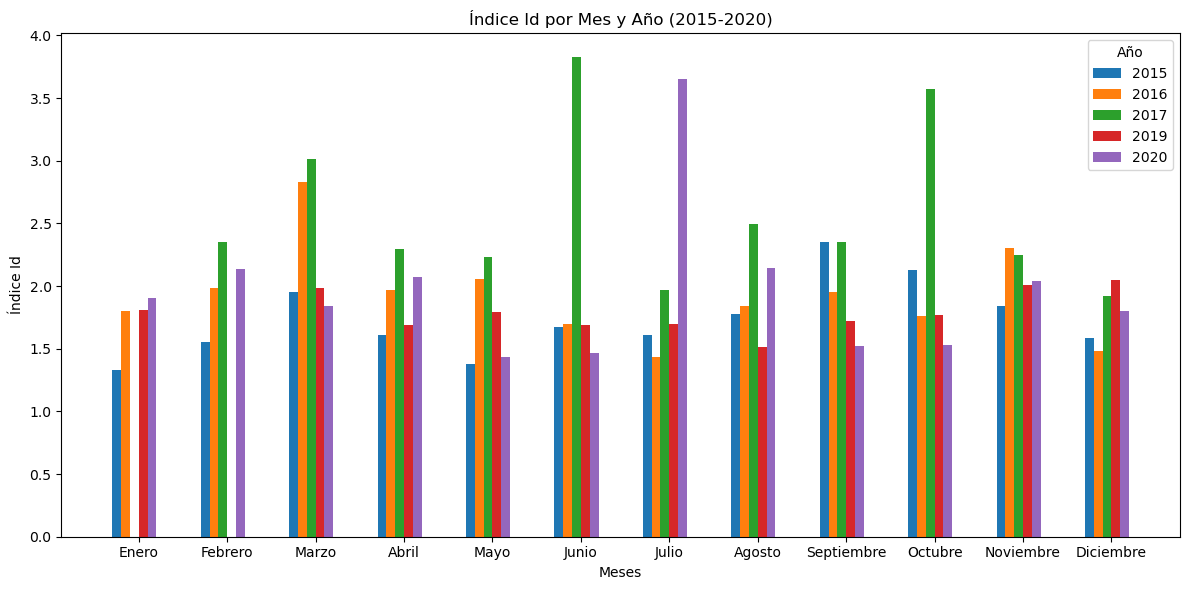

In [21]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import lit
import matplotlib.pyplot as plt
tabla_resultado_2015 = tabla_resultado_2015.withColumn("Año", lit(2015))
tabla_resultado_2016 = tabla_resultado_2016.withColumn("Año", lit(2016))
tabla_resultado_2017 = tabla_resultado_2017.withColumn("Año", lit(2017))
tabla_resultado_2019 = tabla_resultado_2019.withColumn("Año", lit(2019))
tabla_resultado_2020 = tabla_resultado_2020.withColumn("Año", lit(2020))
resultado = (tabla_resultado_2015
             .union(tabla_resultado_2016)
             .union(tabla_resultado_2017)
             .union(tabla_resultado_2019)
             .union(tabla_resultado_2020))
resultado_pandas = resultado.toPandas()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
resultado_pandas = resultado_pandas.sort_values(by=["Mes", "Año"])
años_2 = resultado_pandas["Año"].unique()

x = range(len(meses))
width = 0.15
fig, ax = plt.subplots(figsize=(12, 6))
for i, year in enumerate(años_2):
    data_year = resultado_pandas[resultado_pandas["Año"] == year]
    ax.bar(data_year["Mes"] + i * 0.1, data_year["Id"], width=0.1, label=str(year))

ax.set_xlabel('Meses')
ax.set_ylabel('Índice Id')
ax.set_title('Índice Id por Mes y Año (2015-2020)')
ax.set_xticks([meses +1+ 0.1 * (len(años_2) ) / 2 for meses in x]) 
ax.set_xticklabels(meses)
ax.legend(title='Año')
plt.tight_layout()
plt.show()


5.   Hacer una gráfica del centro de masa de las diaphorinas como función del mes que abarque de 2017 a 2020. Nota: CM=pos*Diaph/Ntrampas, donde CM se refiere al centro de masa, pues es la posición de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número de trampas que se consideraron en el cálculo.

In [22]:
from pyspark.sql import functions as F
from functools import reduce
from pyspark.sql import DataFrame
from pyspark.sql.functions import lit

columnas_comunes = ["Latitud", "Longitud","Ubicacion", 
    "Municipio", "No_DiaphorinasXtrampa", 
    "Mes"
]

a=df_2017.select(columnas_comunes).withColumn("Año", lit(2017))
b=df_2019.select(columnas_comunes).withColumn("Año", lit(2019))
c=df_2020.select(columnas_comunes).withColumn("Año", lit(2020))

df_all = a.union(b).union(c).dropna()

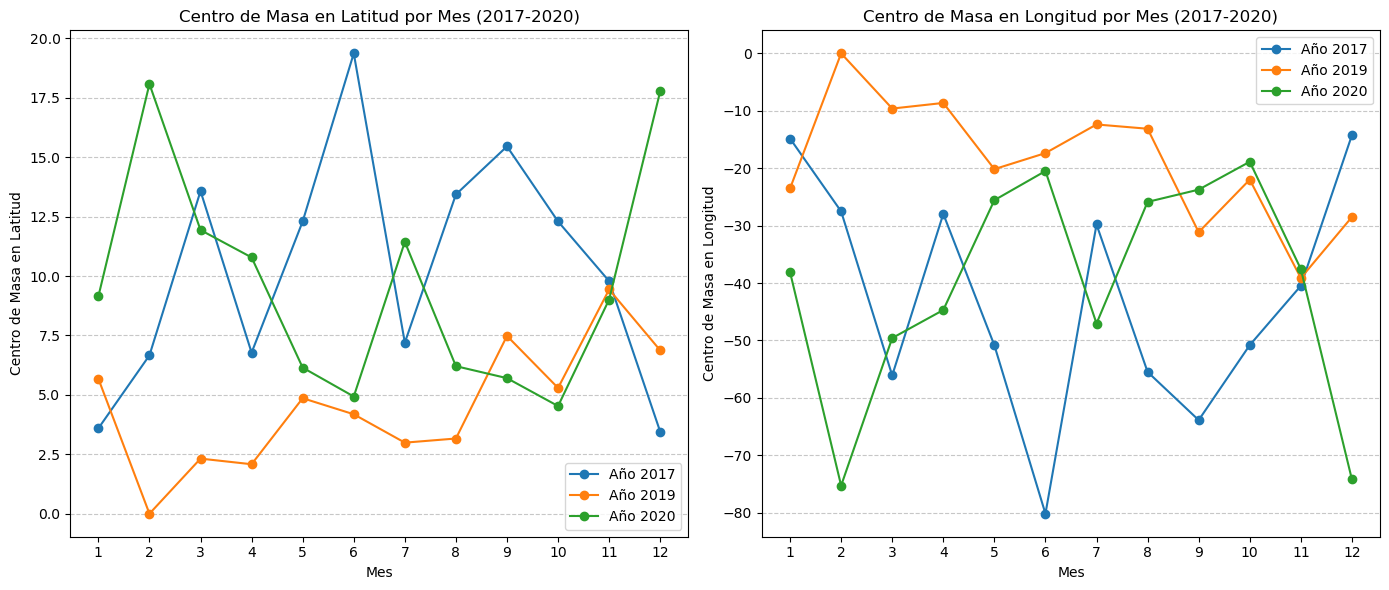

In [23]:
cm_data = []

for year in [2017, 2019, 2020]:
    for month in range(1, 13):
        df_month = df_all.filter((F.col("Año") == year) & (F.col("Mes") == month))

        if df_month.count() == 0:
            continue
        promedio_diaph = df_month.groupBy("Ubicacion") \
            .agg(F.mean("No_DiaphorinasXtrampa").alias("Promedio_Diaph"),
                 F.first("Latitud").alias("Latitud"),
                 F.first("Longitud").alias("Longitud"))

        N_trampas = promedio_diaph.count()

        cm_latitud = (promedio_diaph.select((F.col("Latitud") * F.col("Promedio_Diaph")).alias("CM_Latitud")).agg(F.sum("CM_Latitud")).first()[0]) / N_trampas
        cm_longitud = (promedio_diaph.select((F.col("Longitud") * F.col("Promedio_Diaph")).alias("CM_Longitud")).agg(F.sum("CM_Longitud")).first()[0]) / N_trampas

        cm_data.append({'Año': year, 'Mes': month, 'CM_Latitud': cm_latitud, 'CM_Longitud': cm_longitud})
cm_df = pd.DataFrame(cm_data)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for year in [2017, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Latitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Latitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Latitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
for year in [2017, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Longitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Longitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Longitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [24]:
spark.stop()